# **1. Perkenalan Dataset**


Data didapatkan dari [Kaggle: Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) Dataset ini memiliki 100.000 Data dengan 27 Fitur, bertujuan untuk mengklasifikasikan nilai credit dari customer.

# **2. Import Library**

In [1]:
import re
from collections import Counter

from typing import Tuple, Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [2]:
#Type your code here
raw_data = pd.read_csv('../Credit Score Dataset.csv')
raw_data.info()

/tmp/ipykernel_832664/789602288.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../Credit Score Dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [3]:
raw_data.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# **4. Exploratory Data Analysis (EDA)**


### Interpretasi Missing Values

Berdasarkan hasil `raw_data.isnull().sum()`, terlihat bahwa sebagian besar fitur tidak memiliki missing values. Namun, terdapat beberapa kolom dengan jumlah data hilang yang cukup signifikan, antara lain:

* **Name**: 9.985 data kosong.
* **Monthly\_Inhand\_Salary**: 150.002 data kosong, jumlah terbesar di antara semua fitur.
* **Type\_of\_Loan**: 11.408 data kosong.
* **Num\_of\_Delayed\_Payment**: 7.002 data kosong.
* **Num\_Credit\_Inquiries**: 1.965 data kosong.
* **Credit\_History\_Age**: 9.030 data kosong.
* **Amount\_invested\_monthly**: 4.479 data kosong.
* **Monthly\_Balance**: 1.200 data kosong.

### Implikasi

1. **Kualitas Data**: Fitur dengan missing values besar seperti `Monthly_Inhand_Salary` dan `Name` berpotensi memengaruhi analisis selanjutnya.
2. **Penanganan Data**: Perlu dipertimbangkan strategi imputasi (mengisi dengan nilai median/mean, interpolasi, atau model prediksi) atau menghapus kolom/record tertentu jika jumlah missing terlalu dominan.
3. **Signifikansi Variabel**: Fitur-fitur yang berhubungan dengan kondisi finansial (`Monthly_Inhand_Salary`, `Credit_History_Age`, `Num_of_Delayed_Payment`) sangat penting untuk model prediktif. Kehilangan data pada fitur ini bisa menurunkan performa model jika tidak ditangani dengan tepat.

Dengan demikian, langkah selanjutnya dalam EDA adalah melakukan analisis distribusi nilai, outlier, serta strategi yang paling tepat untuk menangani missing values tersebut.


In [4]:
raw_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data Cleaning

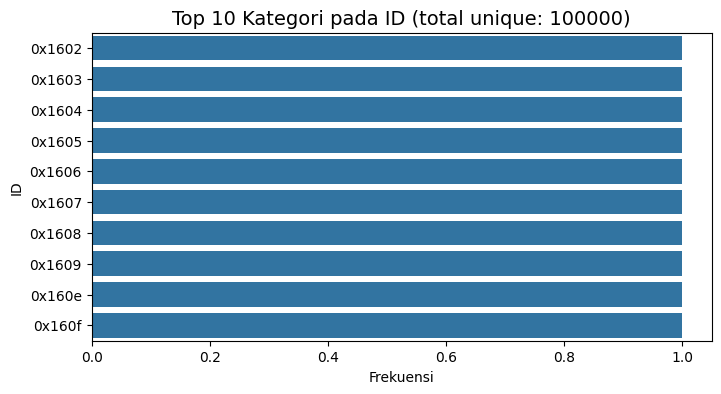

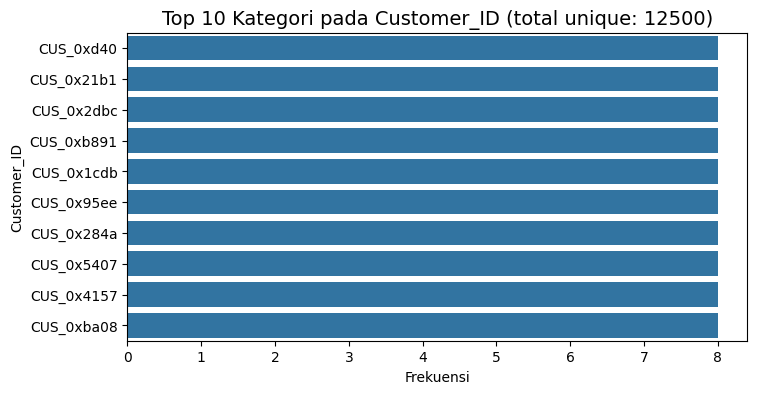

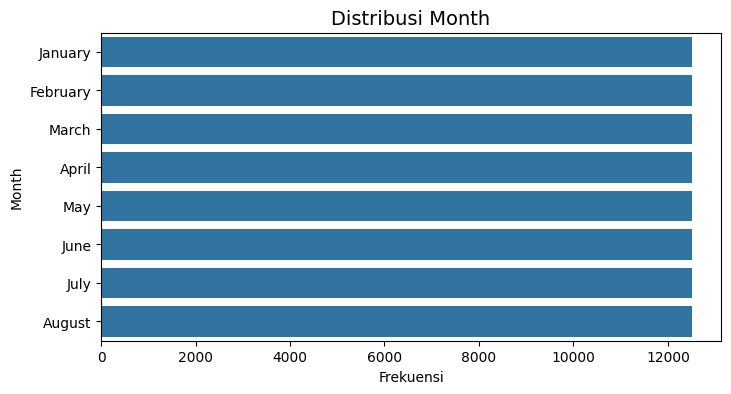

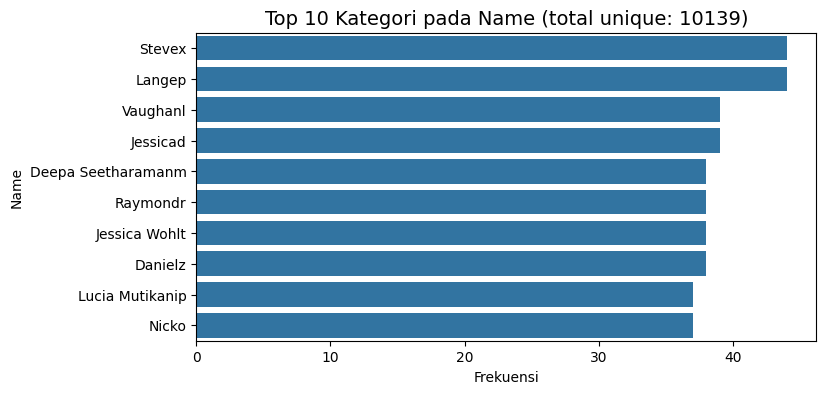

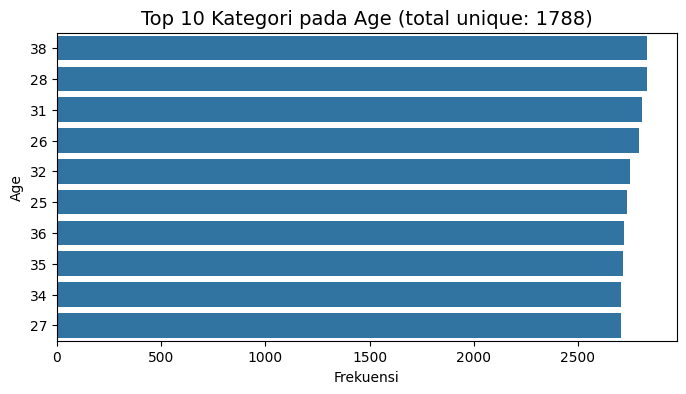

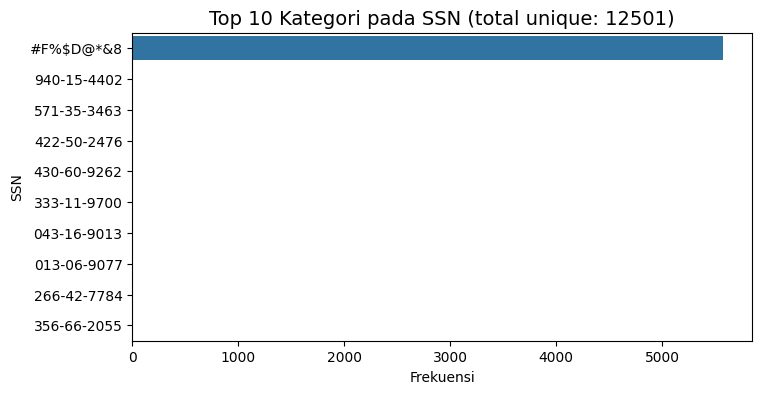

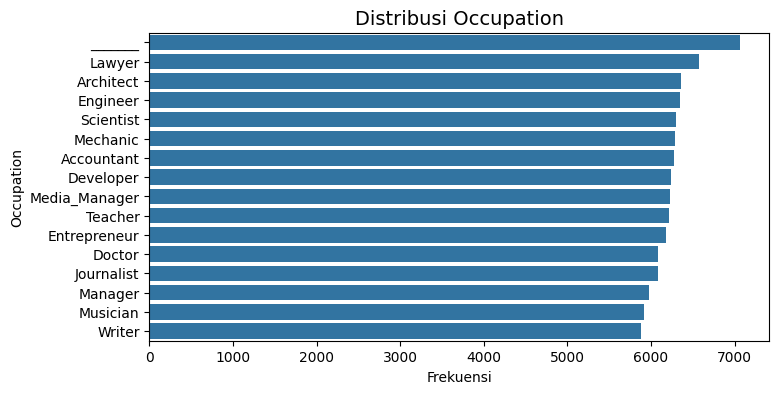

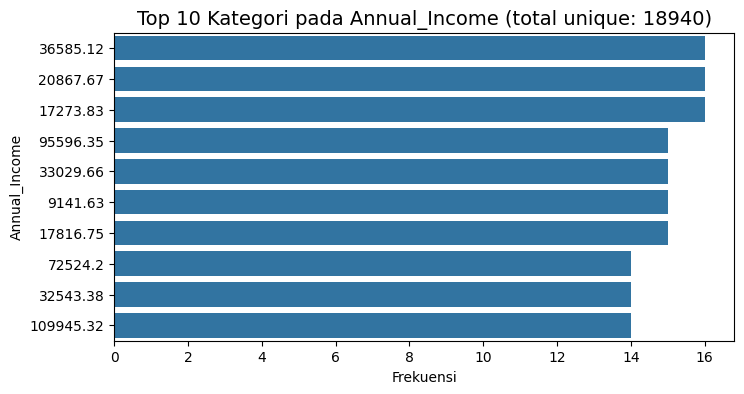

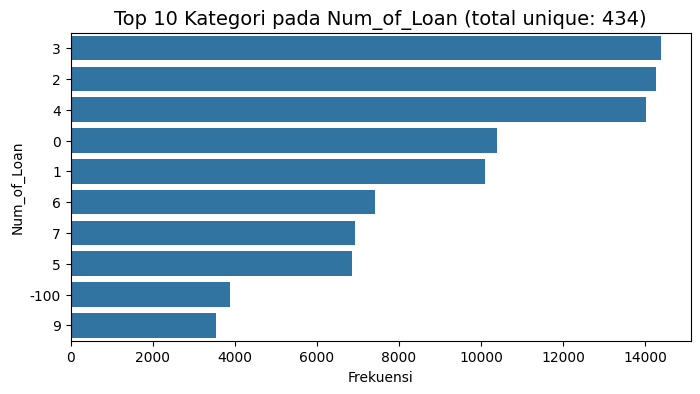

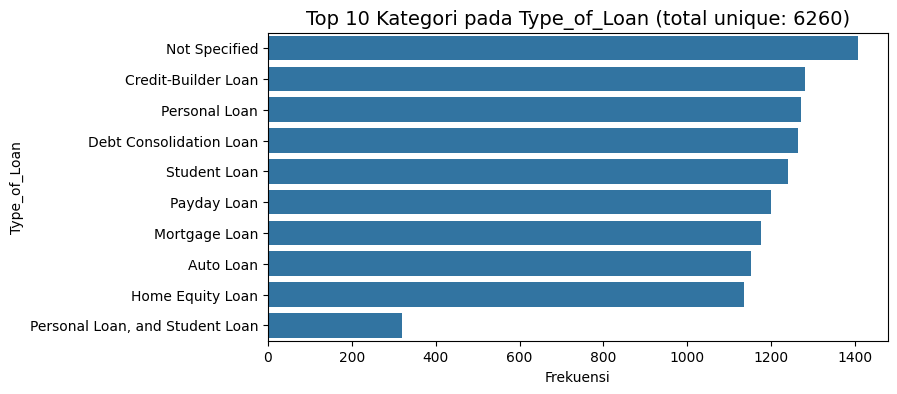

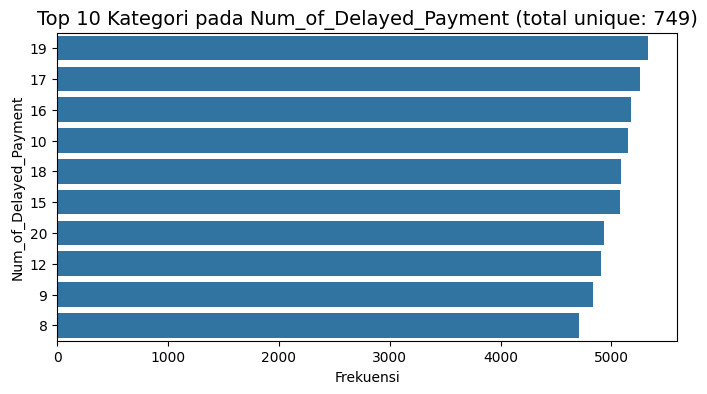

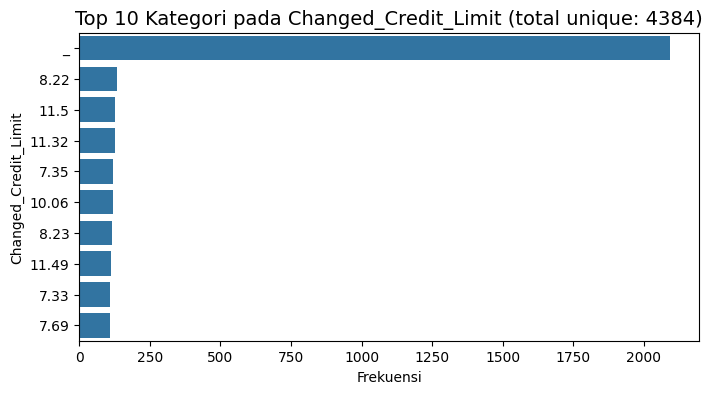

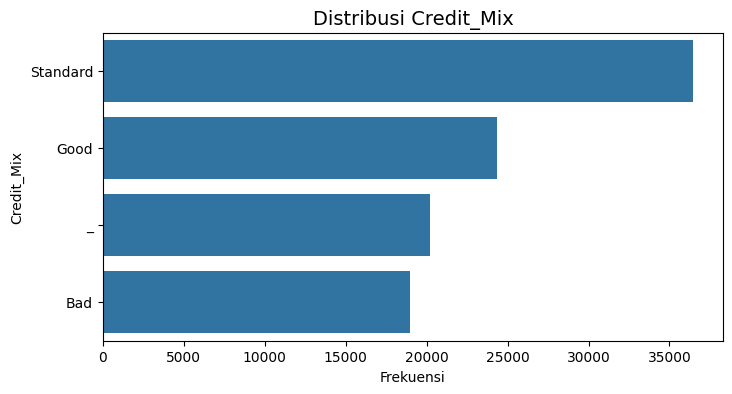

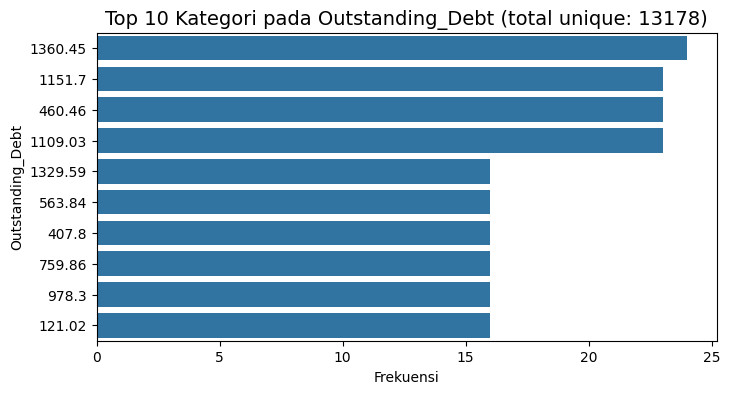

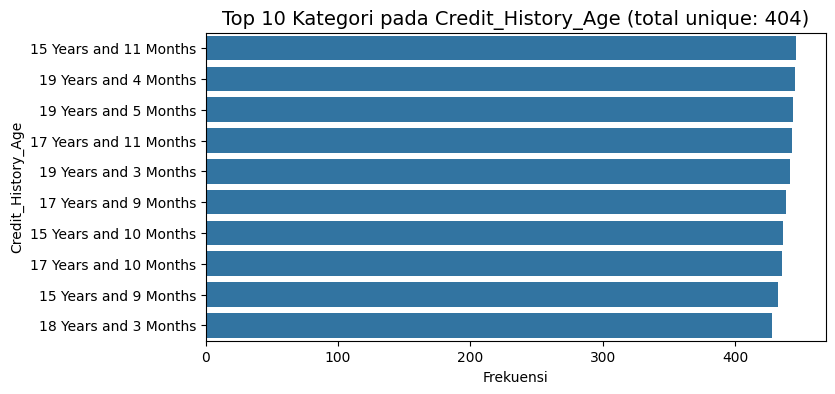

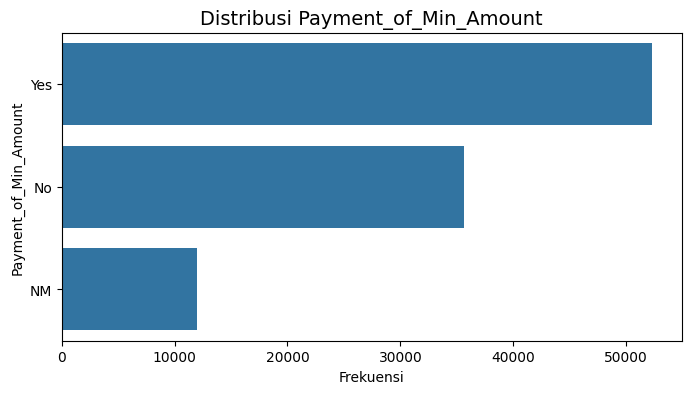

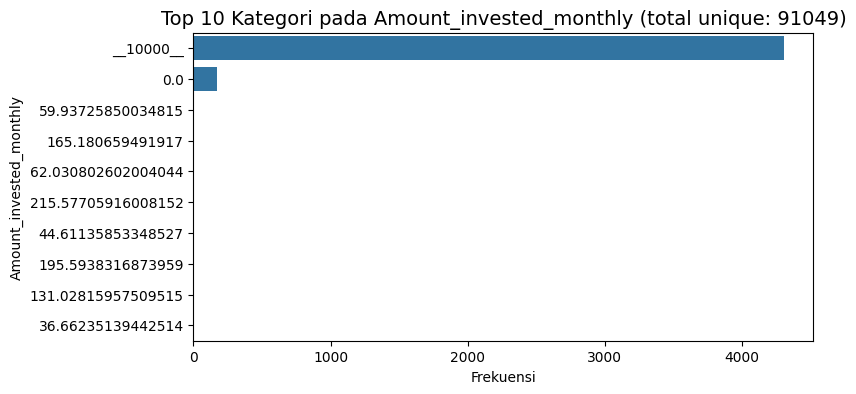

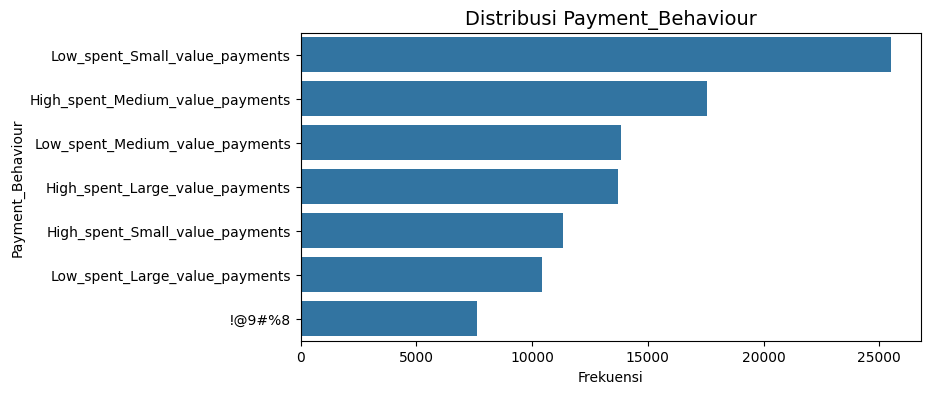

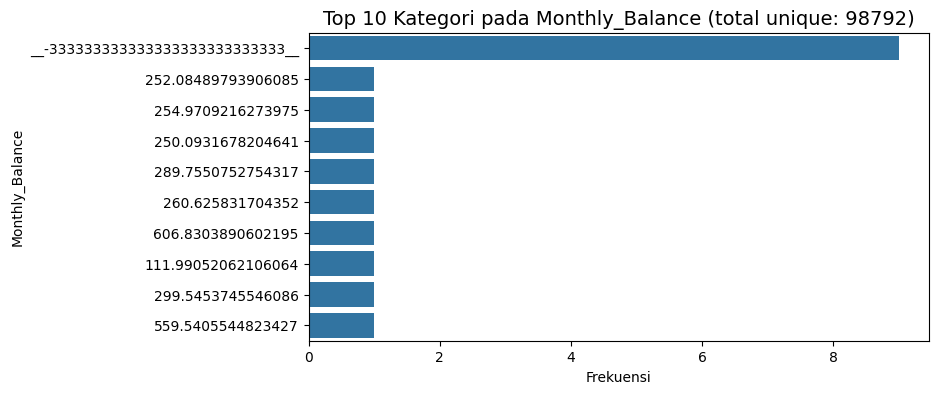

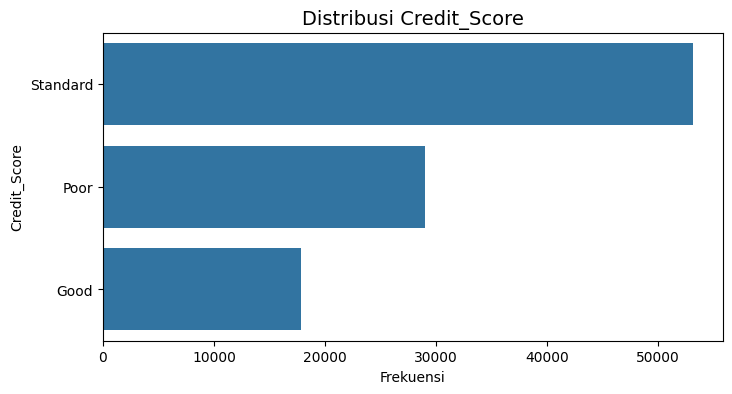

In [5]:
# Pisahkan fitur numerik dan kategorikal
num_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = raw_data.select_dtypes(include=["object"]).columns

# Univariate Analysis untuk variabel kategorikal dengan pendekatan adaptif
for col in cat_cols:
    unique_count = raw_data[col].nunique()
    plt.figure(figsize=(8, 4))

    if unique_count <= 20:
        # kategori sedikit → countplot normal
        sns.countplot(y=raw_data[col], order=raw_data[col].value_counts().index)
        plt.title(f"Distribusi {col}", fontsize=14)
        plt.xlabel("Frekuensi")
        plt.ylabel(col)
    else:
        # kategori terlalu banyak → tampilkan top 10
        top_values = raw_data[col].value_counts().head(10)
        sns.barplot(x=top_values.values, y=top_values.index)
        plt.title(
            f"Top 10 Kategori pada {col} (total unique: {unique_count})", fontsize=14
        )
        plt.xlabel("Frekuensi")
        plt.ylabel(col)

    plt.show()


In [6]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Age"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Age"]
print(invalid_values)

raw_data["Age"] = (
    raw_data["Age"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(int)
)

raw_data["Age"].head()


8          28_
54         34_
58         30_
71         24_
89         33_
         ...  
99908    4808_
99922      38_
99933      38_
99942      48_
99987      28_
Name: Age, Length: 4939, dtype: object


0     23
1     23
2    500
3     23
4     23
Name: Age, dtype: int64

In [7]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Annual_Income"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Annual_Income"]
print(invalid_values)

raw_data["Annual_Income"] = (
    raw_data["Annual_Income"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(float)
)

raw_data["Annual_Income"].head()

10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object


0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: Annual_Income, dtype: float64

In [8]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Num_of_Loan"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Num_of_Loan"]
print(invalid_values)

raw_data["Num_of_Loan"] = (
    raw_data["Num_of_Loan"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)  # buang semua kecuali angka dan titik
    .astype(int)
)

raw_data["Num_of_Loan"].head()


37       0_
80       3_
84       3_
94       2_
119      5_
         ..
99918    4_
99937    0_
99940    0_
99958    4_
99984    5_
Name: Num_of_Loan, Length: 4785, dtype: object


0    4
1    4
2    4
3    4
4    4
Name: Num_of_Loan, dtype: int64

In [9]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Num_of_Delayed_Payment"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Num_of_Delayed_Payment"]
print(invalid_values)

raw_data["Num_of_Delayed_Payment"] = pd.to_numeric(
    raw_data["Num_of_Delayed_Payment"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Num_of_Delayed_Payment"].head()


1        NaN
4        NaN
6         8_
11        3_
30       NaN
        ... 
99973    NaN
99974    NaN
99992    NaN
99993    NaN
99998    NaN
Name: Num_of_Delayed_Payment, Length: 9746, dtype: object


0    7.0
1    NaN
2    7.0
3    4.0
4    NaN
Name: Num_of_Delayed_Payment, dtype: float64

In [10]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Changed_Credit_Limit"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Changed_Credit_Limit"]
print(invalid_values)

raw_data["Changed_Credit_Limit"] = pd.to_numeric(
    raw_data["Changed_Credit_Limit"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Changed_Credit_Limit"].head()


2        _
65       _
66       _
109      _
110      _
        ..
99548    _
99618    _
99800    _
99892    _
99931    _
Name: Changed_Credit_Limit, Length: 2091, dtype: object


0    11.27
1    11.27
2      NaN
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: float64

In [11]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Outstanding_Debt"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Outstanding_Debt"]
print(invalid_values)

raw_data["Outstanding_Debt"] = pd.to_numeric(
    raw_data["Outstanding_Debt"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Outstanding_Debt"].head()


87       1328.93_
142      1283.37_
368      2797.17_
632      3818.57_
703       343.84_
           ...   
99842     1095.9_
99862    1350.85_
99930    1453.61_
99984     3571.7_
99985     3571.7_
Name: Outstanding_Debt, Length: 1009, dtype: object


0    809.98
1    809.98
2    809.98
3    809.98
4    809.98
Name: Outstanding_Debt, dtype: float64

In [12]:
raw_data['Credit_History_Age']

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [13]:
col = raw_data["Credit_History_Age"]

# Regex fleksibel (case-insensitive)
pat = (
    r"(?i)^\s*"
    r"(?:(\d+)\s*(?:years?|yrs?|yr|tahun|thn))?\s*"
    r"(?:and|&|,)?\s*"
    r"(?:(\d+)\s*(?:months?|mos?|mo|bulan|bln))?\s*$"
)

ext = col.astype(str).str.extract(pat)  # dua kolom: [years, months]

yrs = pd.to_numeric(ext[0], errors="coerce")
mos = pd.to_numeric(ext[1], errors="coerce")

total_months = yrs.fillna(0) * 12 + mos.fillna(0)

# Baris yang benar-benar tidak ter-parse (dua-duanya NaN) jadikan NaN
mask_unparsed = yrs.isna() & mos.isna()
total_months = total_months.astype("Float64")
total_months[mask_unparsed] = pd.NA

raw_data["Credit_History_Age_Months"] = total_months

print(raw_data["Credit_History_Age_Months"].head())
print("Jumlah gagal parse:", mask_unparsed.sum())
print(raw_data.loc[mask_unparsed, "Credit_History_Age"].dropna().unique()[:20])

# Hitung missing di kolom asli
print("Missing asli:", raw_data["Credit_History_Age"].isna().sum())

# Cek contoh entri yang gagal parse (tanpa dropna)
print(raw_data.loc[mask_unparsed, "Credit_History_Age"].head(20))

raw_data = raw_data.drop("Credit_History_Age", axis=1)

0    265.0
1     <NA>
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age_Months, dtype: Float64
Jumlah gagal parse: 9030
[]
Missing asli: 9030
1      NaN
7      NaN
19     NaN
40     NaN
42     NaN
45     NaN
56     NaN
72     NaN
77     NaN
87     NaN
110    NaN
117    NaN
131    NaN
133    NaN
154    NaN
156    NaN
181    NaN
182    NaN
190    NaN
192    NaN
Name: Credit_History_Age, dtype: object


In [14]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Amount_invested_monthly"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Amount_invested_monthly"]
print(invalid_values)

raw_data["Amount_invested_monthly"] = pd.to_numeric(
    raw_data["Amount_invested_monthly"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Amount_invested_monthly"].head()


18       __10000__
23       __10000__
28       __10000__
60             NaN
61             NaN
           ...    
99925          NaN
99951    __10000__
99961          NaN
99973    __10000__
99974          NaN
Name: Amount_invested_monthly, Length: 8784, dtype: object


0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
Name: Amount_invested_monthly, dtype: float64

In [15]:
# coba konversi dengan coerce, jadi yang error bakal jadi NaN
converted = pd.to_numeric(raw_data["Monthly_Balance"], errors="coerce")

# ambil nilai asli yang gagal dikonversi
invalid_values = raw_data.loc[converted.isna(), "Monthly_Balance"]
print(invalid_values)

raw_data["Monthly_Balance"] = pd.to_numeric(
    raw_data["Monthly_Balance"]
    .astype(str)
    .str.replace(r"[^0-9.]", "", regex=True)
    .replace("", None),
    errors="coerce",
)

raw_data["Monthly_Balance"].head()


197      NaN
314      NaN
388      NaN
456      NaN
457      NaN
        ... 
99820    NaN
99839    NaN
99852    NaN
99854    NaN
99927    NaN
Name: Monthly_Balance, Length: 1209, dtype: object


0    312.494089
1    284.629162
2    331.209863
3    223.451310
4    341.489231
Name: Monthly_Balance, dtype: float64

In [16]:
print(raw_data['Occupation'].value_counts())
raw_data["Occupation"] = raw_data["Occupation"].replace("_______", np.nan)
print(raw_data["Occupation"].value_counts())

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [17]:
print(raw_data['Credit_Mix'].value_counts())
raw_data["Credit_Mix"] = raw_data["Credit_Mix"].replace("_", np.nan)
print(raw_data["Credit_Mix"].value_counts())

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64


In [18]:
COL = "Type_of_Loan"

# 1) Normalisasi separator
SEP_RE = re.compile(r"\s*(?:,|&|and)\s*", flags=re.I)


def split_tokens(x):
    if pd.isna(x):
        return []
    return [
        t.strip(" ,").strip() for t in SEP_RE.split(str(x)) if t.strip(" ,").strip()
    ]


# 2) Hitung token mentah (untuk audit)
raw_lists = raw_data[COL].apply(split_tokens)

# ---- Audit penyebab Unknown ----
# a) hanya Not Specified / kosong
only_ns = raw_lists.apply(
    lambda lst: len(lst) > 0
    and all(s.lower() in {"not specified", "n/a", "na"} for s in lst)
)
empty_or_ns = raw_data[COL].isna() | only_ns
print("Hanya 'Not Specified' / NaN:", int(empty_or_ns.sum()))

cnt = Counter()
for lst in raw_lists.dropna():
    cnt.update([s.lower() for s in lst if s])
print("Top 30 tokens mentah:")
print(pd.Series(dict(cnt.most_common(30))))

# 3) Kamus pola → label kanonis (ditambah alias umum)
PATTERNS = [
    (r"credit[\s-]*builder", "Credit-Builder Loan"),
    (r"\bpersonal\b|\bcons?umer\b|\bline of credit\b", "Personal Loan"),
    (r"debt\s*consol|consolidation", "Debt Consolidation Loan"),
    (r"\bstudent\b|education", "Student Loan"),
    (r"\bpay\s*day\b|\bcash\s*advance\b", "Payday Loan"),
    (r"\bmort(gage)?\b|\bhome\s*loan\b", "Mortgage Loan"),
    (r"\bauto\b|\bcar\b|\bvehicle\b", "Auto Loan"),
    (r"home\s*equity", "Home Equity Loan"),
]
CANON = [lab for _, lab in PATTERNS]
NOISE = {"not specified", "n/a", "na", "", "-", "--"}


def map_row(lst):
    mapped, had_unknown = set(), False
    if not lst:
        return [], True
    for tok in lst:
        low = tok.lower()
        if low in NOISE:
            continue
        hit = None
        for pat, canon in PATTERNS:
            if re.search(pat, low, flags=re.I):
                hit = canon
                break
        if hit is None:
            had_unknown = True
        else:
            mapped.add(hit)
    if not mapped:
        had_unknown = True
    return sorted(mapped), had_unknown


mapped = raw_lists.apply(map_row)
loan_lists = mapped.apply(lambda x: x[0])
unknown_flag = mapped.apply(lambda x: x[1]).astype(int)


# 4) Bangun multi-hot untuk 8 label
def slug(s):
    return re.sub(r"[^A-Za-z0-9]+", "_", s).strip("_")


created = []
for lab in CANON:
    coln = f"Loan_{slug(lab)}"
    raw_data[coln] = loan_lists.apply(lambda L: int(lab in L))
    created.append(coln)

raw_data["Loan_Unknown"] = unknown_flag

print("\nCreated:", created + ["Loan_Unknown"])
print("Unknown rows (baru):", int(raw_data["Loan_Unknown"].sum()))

# 5) Lihat contoh baris yang masih unknown tetapi tidak kosong/Not Specified
mask_unknown_nonempty = (raw_data["Loan_Unknown"] == 1) & (~empty_or_ns)
sample = raw_data.loc[mask_unknown_nonempty, COL].head(20)
print("\nContoh unknown non-empty (cek apakah perlu tambah alias lagi):")
print(sample.to_string(index=False))

raw_data = raw_data.drop('Type_of_Loan', axis=1)


Hanya 'Not Specified' / NaN: 12968
Top 30 tokens mentah:
payday loan                40568
credit-builder loan        40440
not specified              39616
home equity loan           39104
student loan               38968
mortgage loan              38936
personal loan              38888
debt consolidation loan    38776
auto loan                  37992
dtype: int64

Created: ['Loan_Credit_Builder_Loan', 'Loan_Personal_Loan', 'Loan_Debt_Consolidation_Loan', 'Loan_Student_Loan', 'Loan_Payday_Loan', 'Loan_Mortgage_Loan', 'Loan_Auto_Loan', 'Loan_Home_Equity_Loan', 'Loan_Unknown']
Unknown rows (baru): 12968

Contoh unknown non-empty (cek apakah perlu tambah alias lagi):
Series([], )


In [19]:
print(raw_data["Payment_of_Min_Amount"].value_counts())
raw_data["Payment_of_Min_Amount"] = raw_data["Payment_of_Min_Amount"].replace("NM", np.nan)
print(raw_data["Payment_of_Min_Amount"].value_counts())


Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64


In [20]:
print(raw_data["Payment_Behaviour"].value_counts())
raw_data["Payment_Behaviour"] = raw_data["Payment_Behaviour"].replace("!@9#%8", np.nan)
print(raw_data["Payment_Behaviour"].value_counts())


Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64


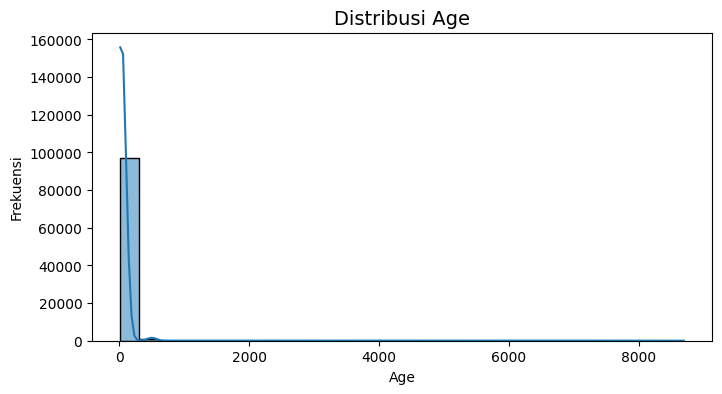

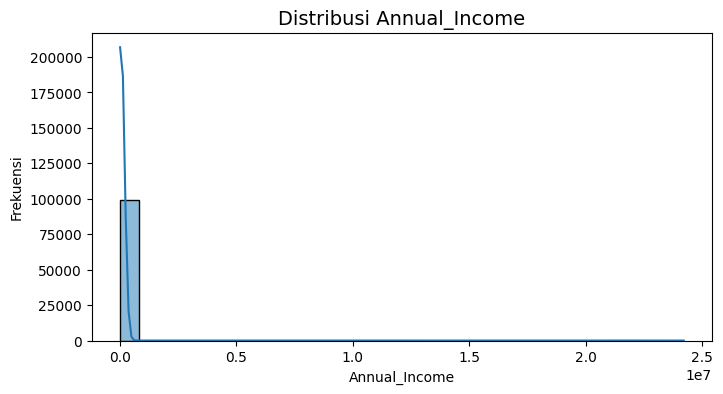

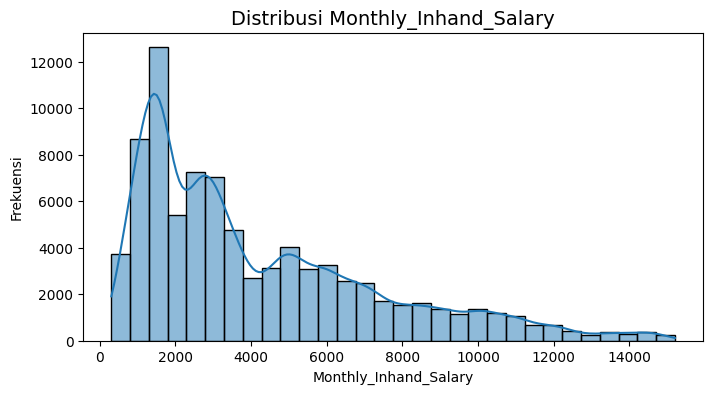

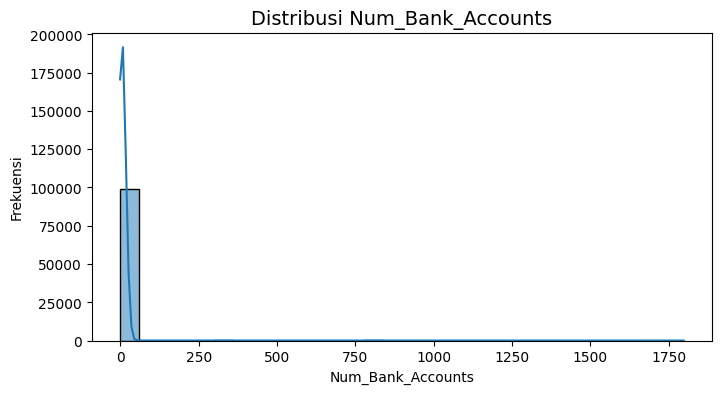

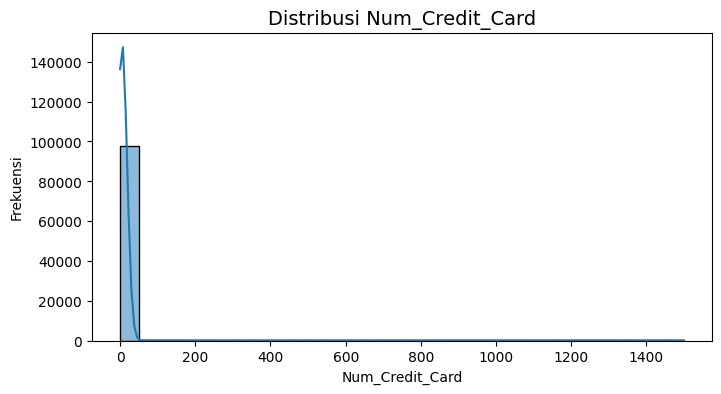

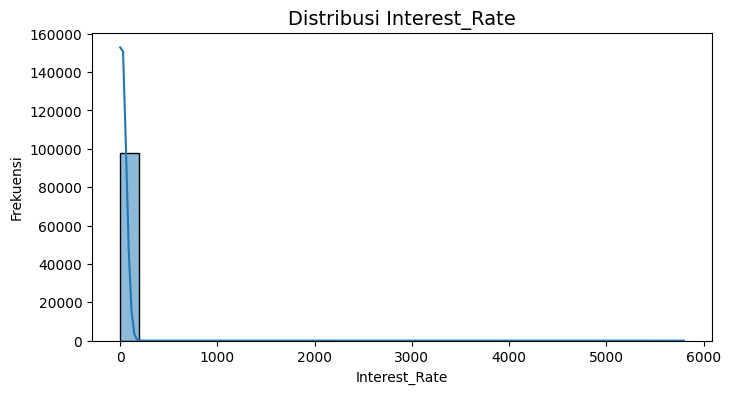

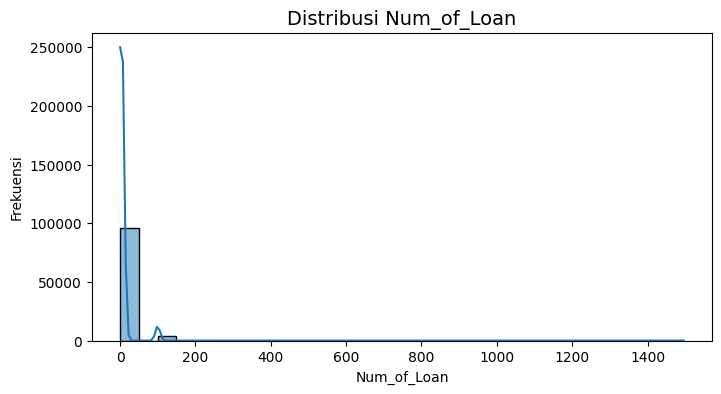

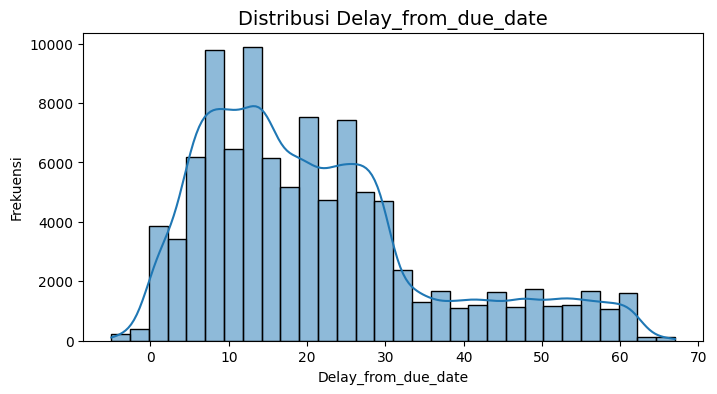

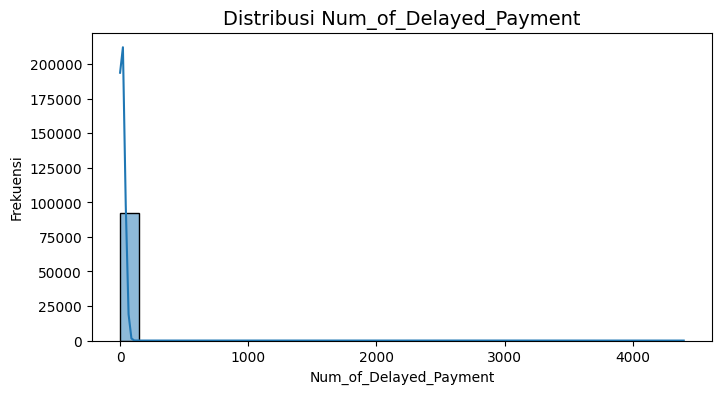

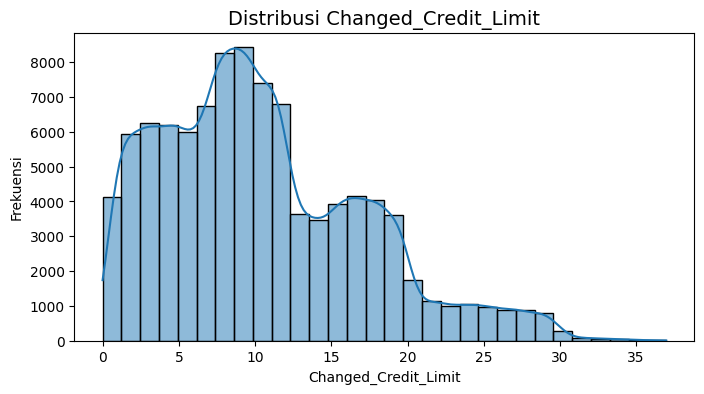

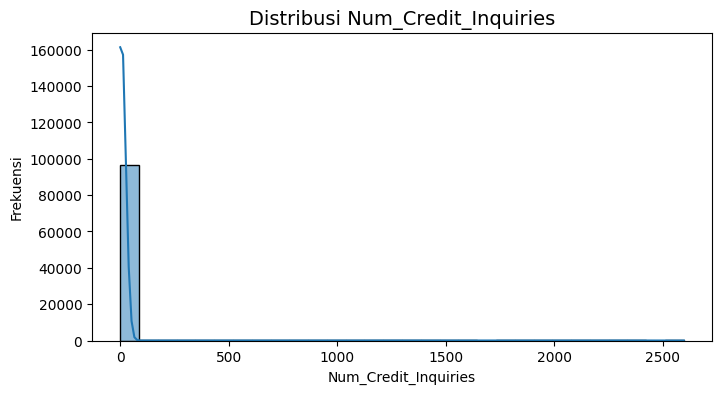

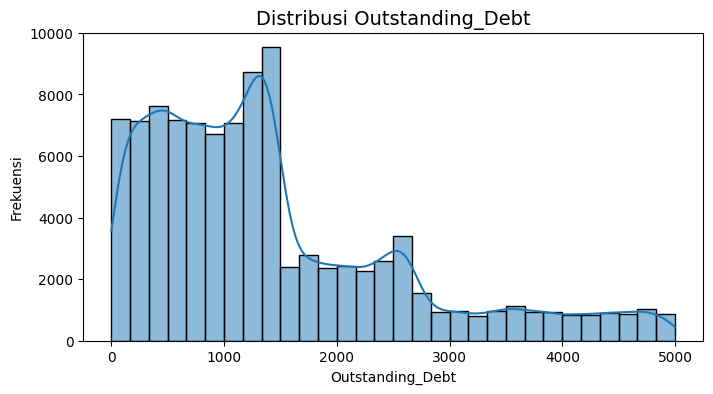

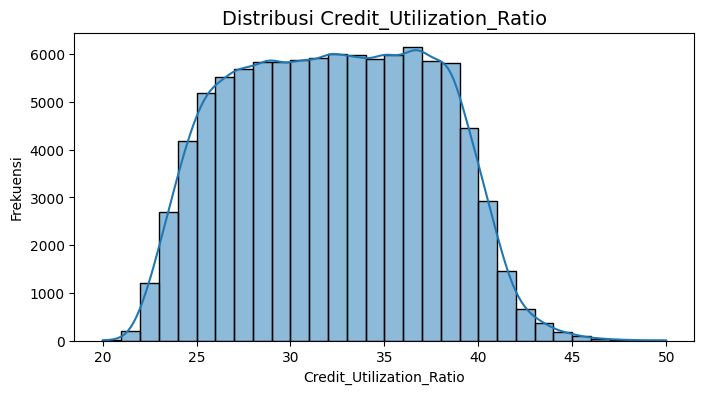

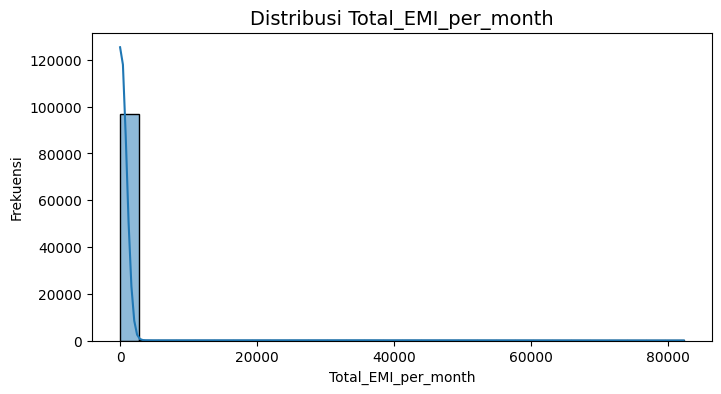

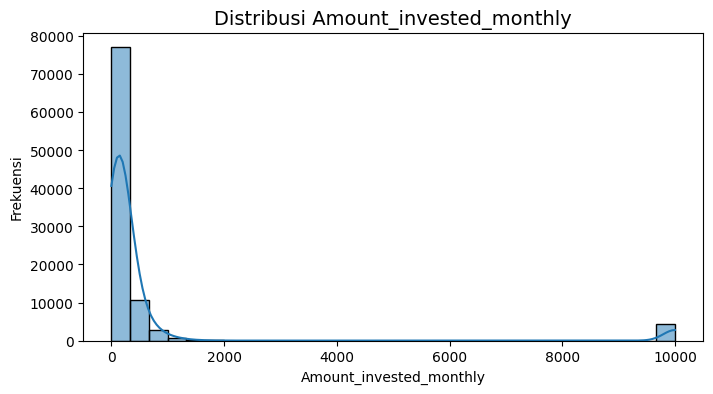

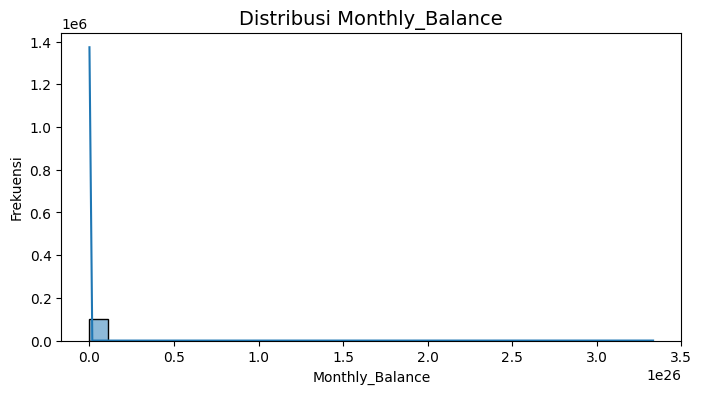

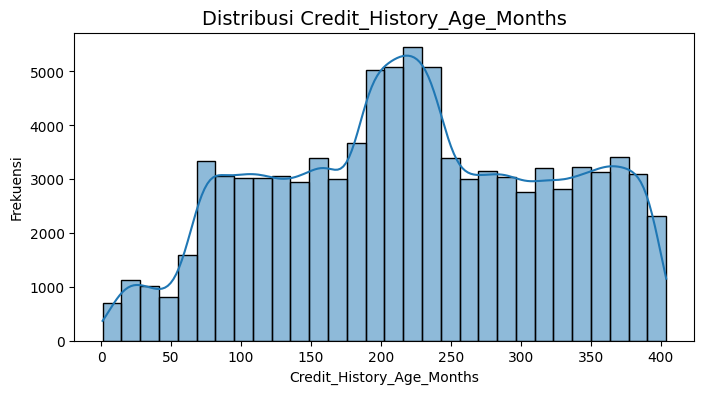

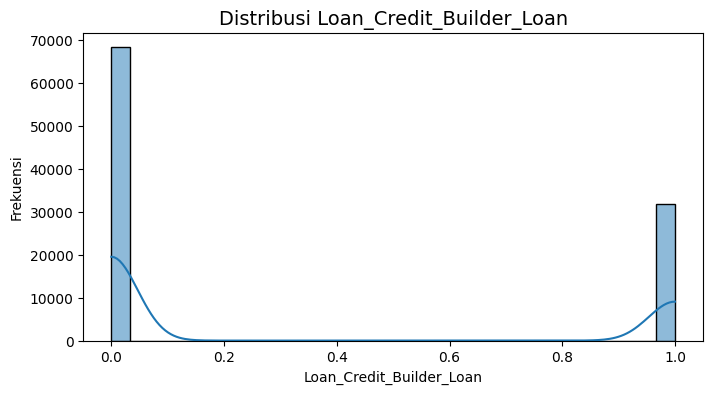

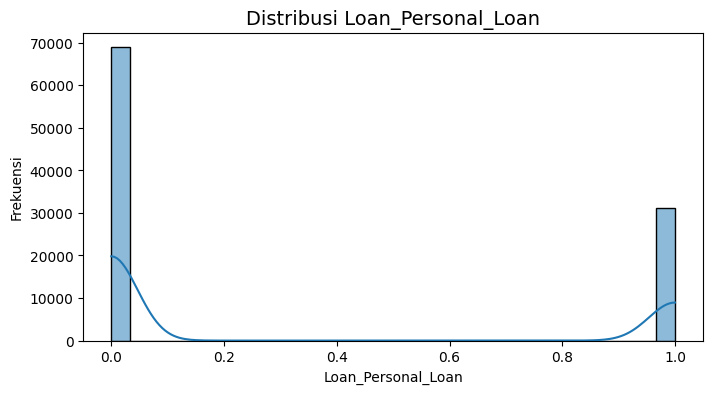

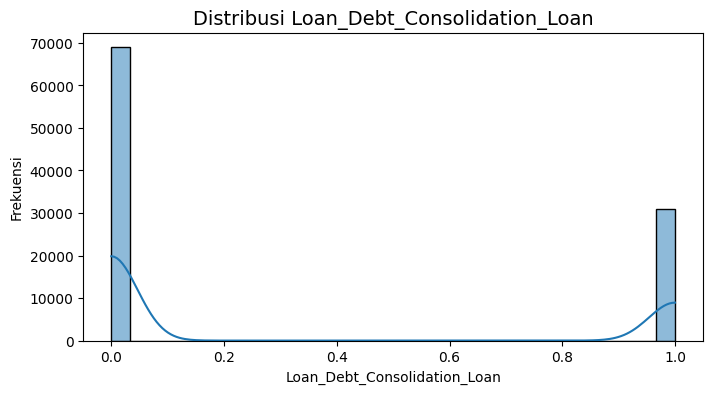

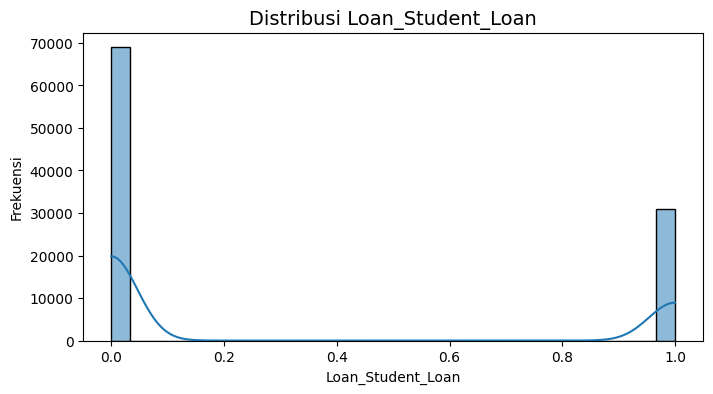

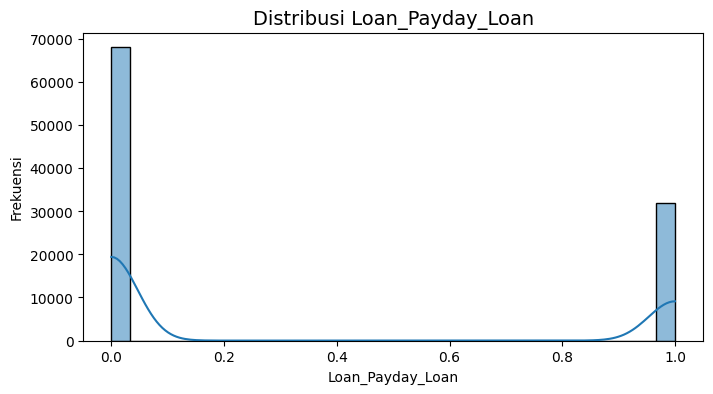

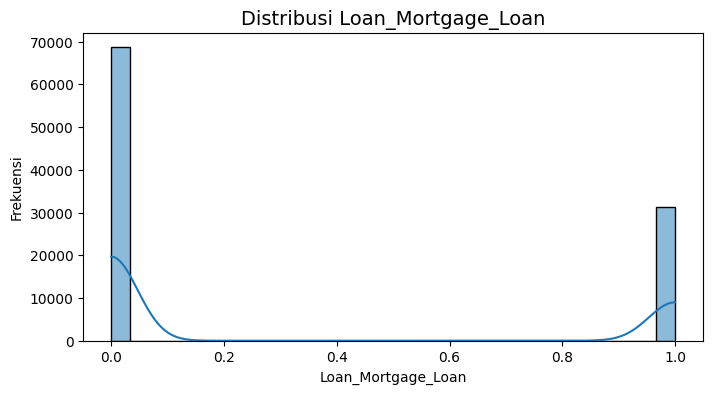

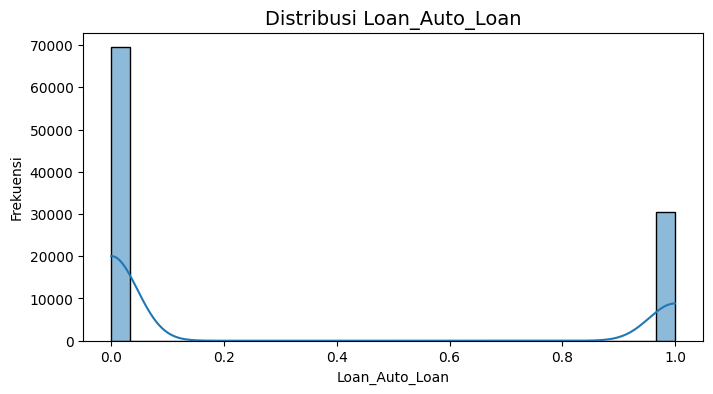

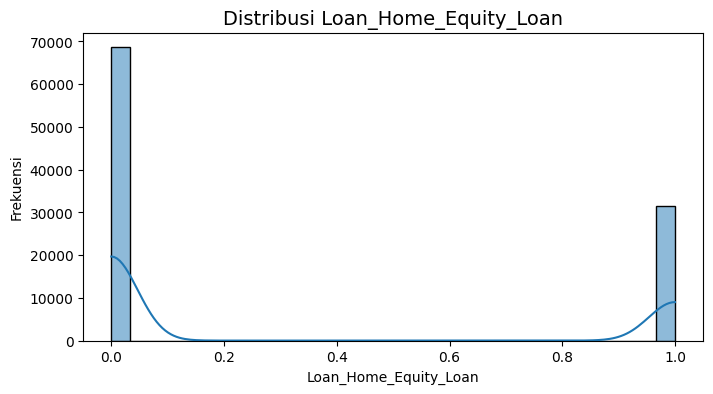

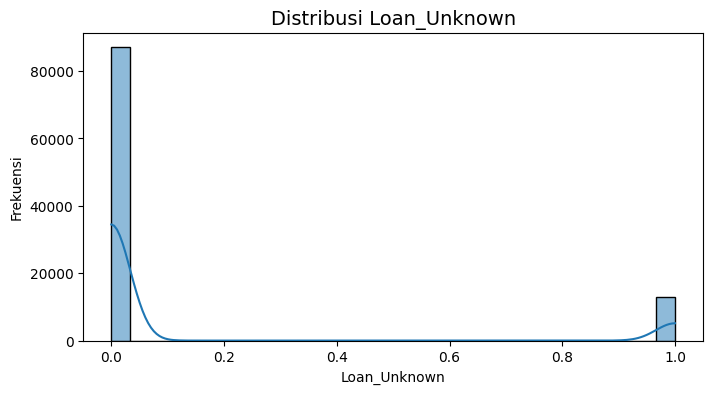

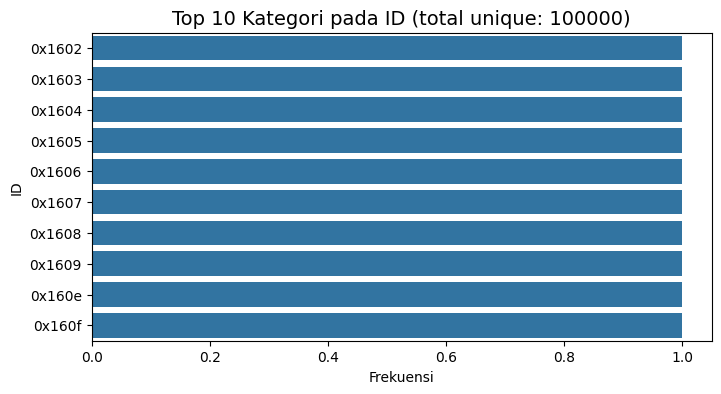

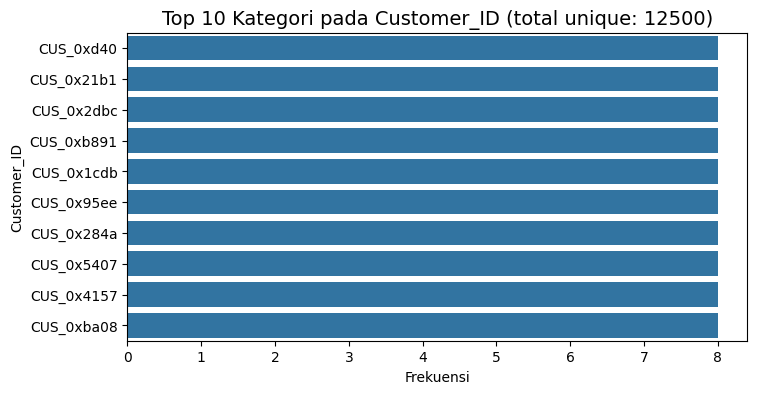

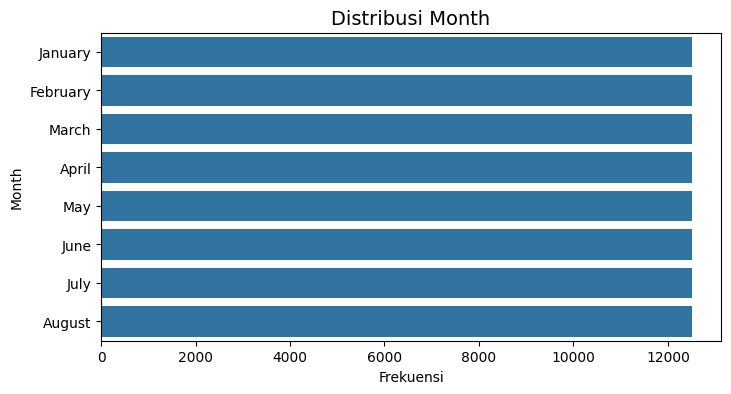

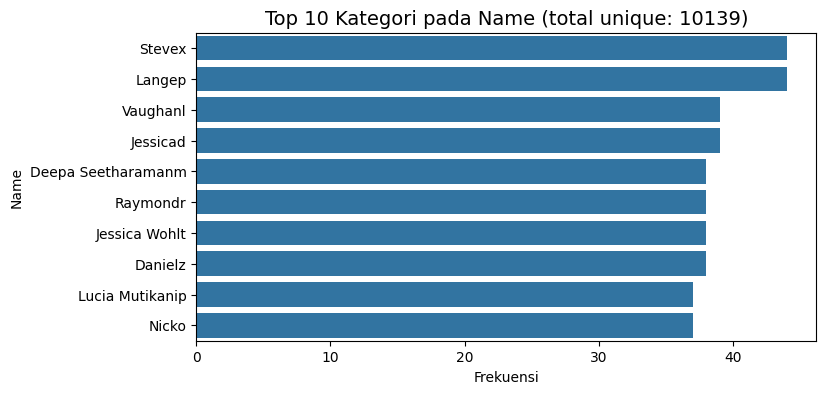

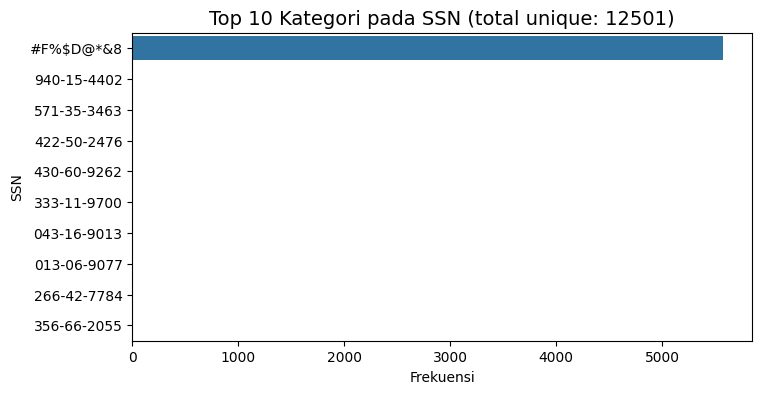

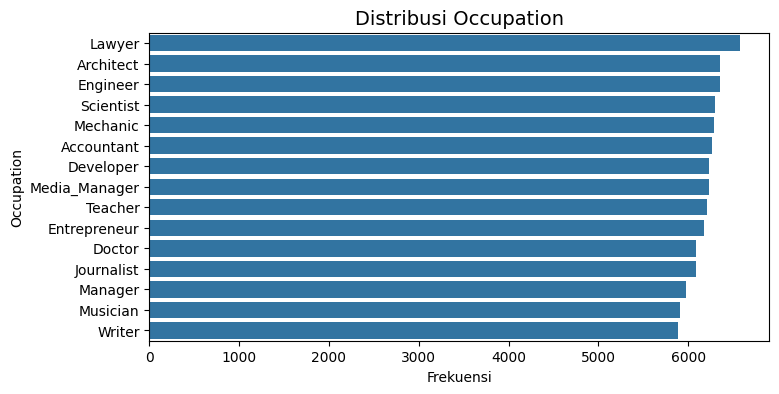

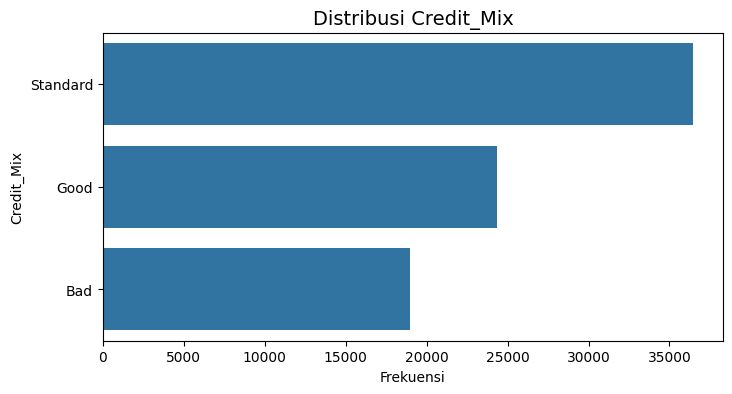

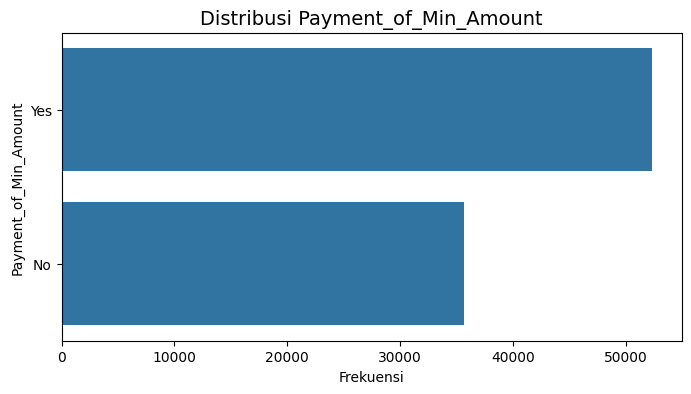

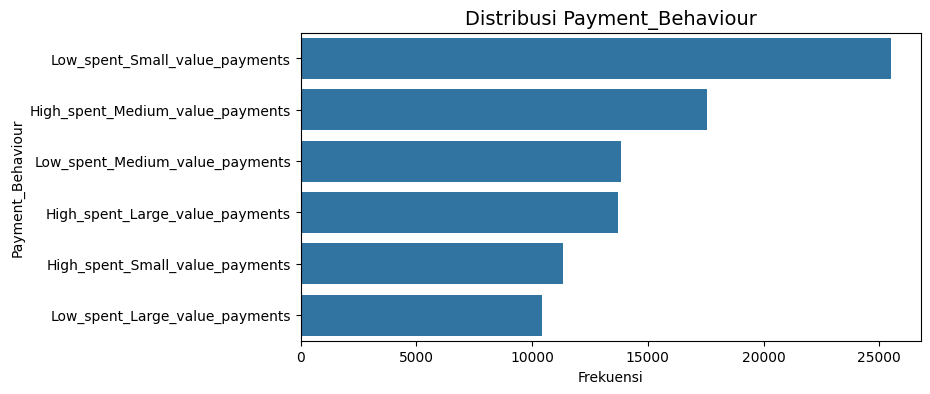

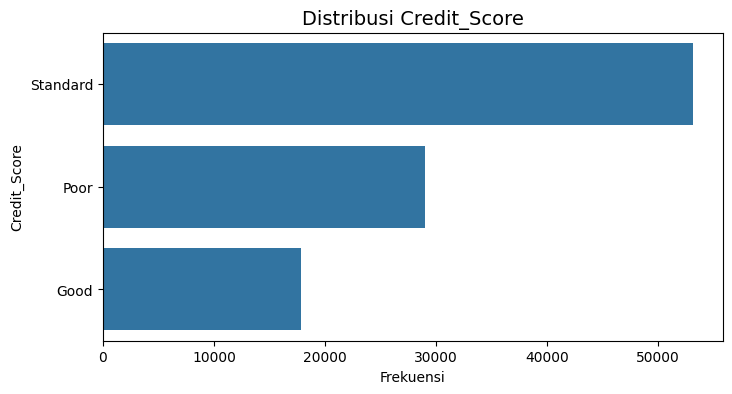

In [21]:
# Pisahkan fitur numerik dan kategorikal
num_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = raw_data.select_dtypes(include=["object"]).columns

# Univariate Analysis untuk variabel numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(raw_data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribusi {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Univariate Analysis untuk variabel kategorikal dengan pendekatan adaptif
for col in cat_cols:
    unique_count = raw_data[col].nunique()
    plt.figure(figsize=(8, 4))

    if unique_count <= 20:
        # kategori sedikit → countplot normal
        sns.countplot(y=raw_data[col], order=raw_data[col].value_counts().index)
        plt.title(f"Distribusi {col}", fontsize=14)
        plt.xlabel("Frekuensi")
        plt.ylabel(col)
    else:
        # kategori terlalu banyak → tampilkan top 10
        top_values = raw_data[col].value_counts().head(10)
        sns.barplot(x=top_values.values, y=top_values.index)
        plt.title(
            f"Top 10 Kategori pada {col} (total unique: {unique_count})", fontsize=14
        )
        plt.xlabel("Frekuensi")
        plt.ylabel(col)

    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
raw_data = raw_data.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1)


In [23]:
def clip_invalid(
    s: pd.Series, rules: Tuple[Optional[int | float], Optional[int | float]]
) -> pd.Series:
    """
    Ubah nilai di luar [lo, hi] menjadi NaN untuk Series tunggal.

    Parameters
    ----------
    s : pd.Series
        Data kolom tunggal.
    rules : tuple (lo, hi)
        Batas bawah dan atas. Gunakan None untuk skip salah satu.
        Contoh: (0, 10), (None, 100), (18, None)
    """
    s = s.copy()
    lo, hi = rules
    if lo is not None:
        s.loc[s < lo] = np.nan
    if hi is not None:
        s.loc[s > hi] = np.nan
    return s


In [24]:
print("Age", raw_data['Age'].quantile(0.95))
print("Annual_Income" , raw_data["Annual_Income"].quantile(0.99))
print("Num_Bank_Accounts" , raw_data["Num_Bank_Accounts"].quantile(0.97))
print("Num_Credit_Card" , raw_data["Num_Credit_Card"].quantile(0.97))
print("Interest_Rate" , raw_data['Interest_Rate'].quantile(0.97))
print("Num_of_Loan" , raw_data["Num_of_Loan"].quantile(0.95))
print("Num_of_Delayed_Payment" , raw_data["Num_of_Delayed_Payment"].quantile(0.99))
print("Num_Credit_Inquiries" , raw_data["Num_Credit_Inquiries"].quantile(0.98))
print("Total_EMI_per_month" , raw_data["Total_EMI_per_month"].quantile(0.96))
print("Amount_invested_monthly" , raw_data["Amount_invested_monthly"].quantile(0.95))
print("Monthly_Balance" , raw_data["Monthly_Balance"].quantile(0.9999))

Age 54.0
Annual_Income 179987.28
Num_Bank_Accounts 10.0
Num_Credit_Card 10.0
Interest_Rate 34.0
Num_of_Loan 9.0
Num_of_Delayed_Payment 27.0
Num_Credit_Inquiries 16.0
Total_EMI_per_month 611.2866937353463
Amount_invested_monthly 1149.4057853186484
Monthly_Balance 1579.3817006179677


In [25]:
raw_data['Age'] = clip_invalid(raw_data['Age'], (1, 70))
raw_data["Annual_Income"] = clip_invalid(raw_data["Annual_Income"], (1, 200000))
raw_data["Num_Bank_Accounts"] = clip_invalid(raw_data["Num_Bank_Accounts"], (1, 10))
raw_data["Num_Credit_Card"] = clip_invalid(raw_data["Num_Credit_Card"], (1, 10))
raw_data["Interest_Rate"] = clip_invalid(raw_data["Interest_Rate"], (0, 100))
raw_data["Num_of_Loan"] = clip_invalid(raw_data["Num_of_Loan"], (1, 10))
raw_data["Num_of_Delayed_Payment"] = clip_invalid(raw_data["Num_of_Delayed_Payment"], (1, 30))
raw_data["Num_Credit_Inquiries"] = clip_invalid(raw_data["Num_Credit_Inquiries"], (1, 30))
raw_data["Total_EMI_per_month"] = clip_invalid(raw_data["Total_EMI_per_month"], (0, 900))
raw_data["Amount_invested_monthly"] = clip_invalid(raw_data["Amount_invested_monthly"], (0, 1500))
raw_data["Monthly_Balance"] = clip_invalid(raw_data["Monthly_Balance"], (0, 2000))

In [26]:
from sklearn.preprocessing import PowerTransformer

# high_skew = [...]  # sudah kamu siapkan, tanpa kolom biner/loan
pt_yj = PowerTransformer(method="yeo-johnson", standardize=False)

loan_col = [
    "Loan_Credit_Builder_Loan",
    "Loan_Personal_Loan",
    "Loan_Debt_Consolidation_Loan",
    "Loan_Mortgage_Loan",
    "Loan_Auto_Loan",
    "Loan_Home_Equity_Loan",
    "Loan_Unknown",
    "Loan_Payday_Loan",
    "Loan_Student_Loan",
]

num_cols = raw_data.select_dtypes(include="number").columns

high_skew = [
    col for col in num_cols if raw_data[col].skew() > 1 and col not in loan_col
]

mid_skew = [
    col for col in num_cols if 0.5 < raw_data[col].skew() < 1 and col not in loan_col
]

raw_data[high_skew] = pt_yj.fit_transform(raw_data[high_skew])

In [27]:
raw_data.select_dtypes(include="number").skew()

Age                             0.155527
Annual_Income                  -0.012065
Monthly_Inhand_Salary            -0.0188
Num_Bank_Accounts              -0.040052
Num_Credit_Card                 0.225652
Interest_Rate                   0.592513
Num_of_Loan                     0.565116
Delay_from_due_date             0.966395
Num_of_Delayed_Payment          -0.12751
Changed_Credit_Limit            0.726421
Num_Credit_Inquiries            0.463929
Outstanding_Debt               -0.044111
Credit_Utilization_Ratio        0.028617
Total_EMI_per_month            -0.088312
Amount_invested_monthly         0.010662
Monthly_Balance                 0.110001
Credit_History_Age_Months      -0.048234
Loan_Credit_Builder_Loan        0.785199
Loan_Personal_Loan              0.816397
Loan_Debt_Consolidation_Loan    0.819625
Loan_Student_Loan               0.819625
Loan_Payday_Loan                0.774516
Loan_Mortgage_Loan              0.803537
Loan_Auto_Loan                  0.844017
Loan_Home_Equity

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Month                         100000 non-null  object 
 1   Age                           97219 non-null   float64
 2   Occupation                    92938 non-null   object 
 3   Annual_Income                 99001 non-null   float64
 4   Monthly_Inhand_Salary         84998 non-null   float64
 5   Num_Bank_Accounts             94327 non-null   float64
 6   Num_Credit_Card               97680 non-null   float64
 7   Interest_Rate                 97988 non-null   float64
 8   Num_of_Loan                   84722 non-null   float64
 9   Delay_from_due_date           100000 non-null  int64  
 10  Num_of_Delayed_Payment        90653 non-null   float64
 11  Changed_Credit_Limit          97909 non-null   float64
 12  Num_Credit_Inquiries          89415 non-null 

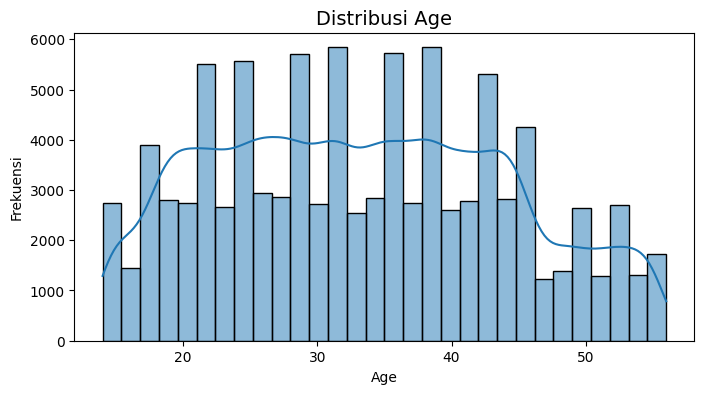

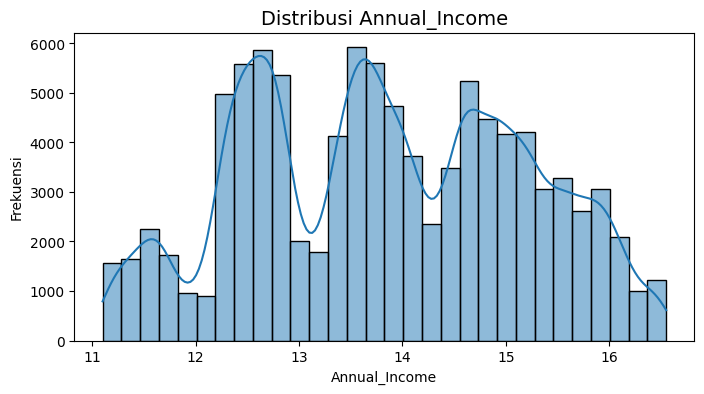

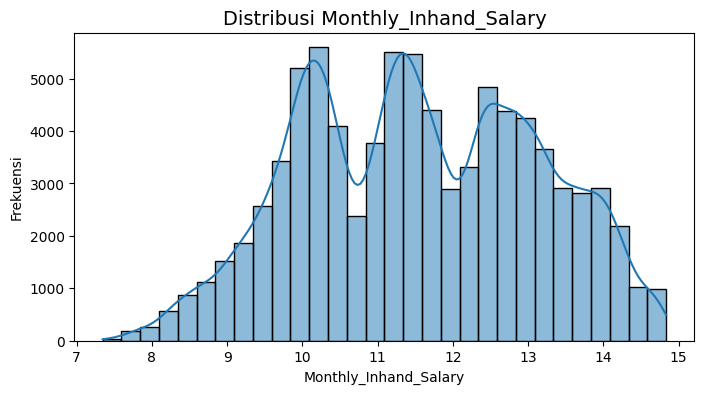

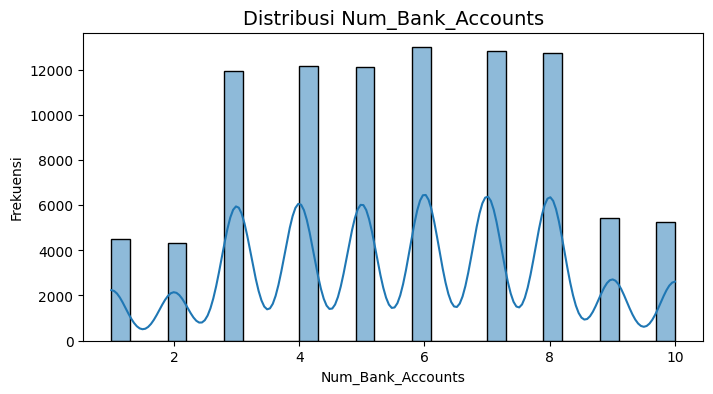

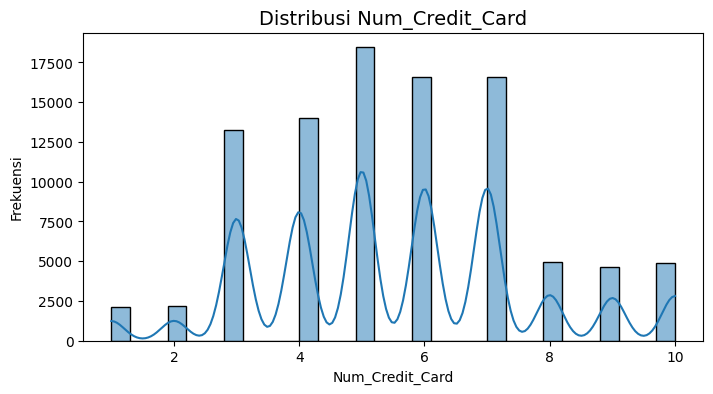

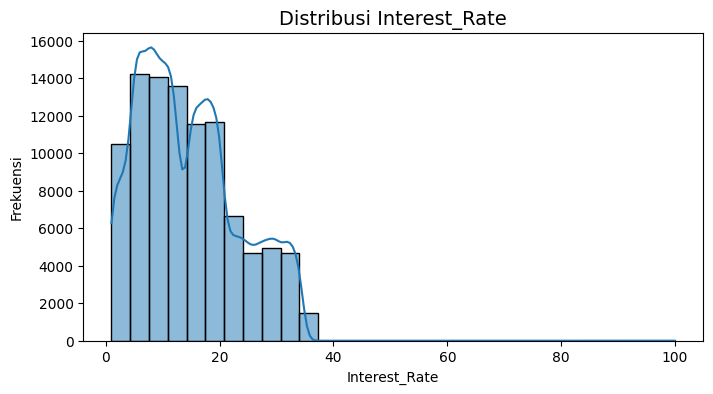

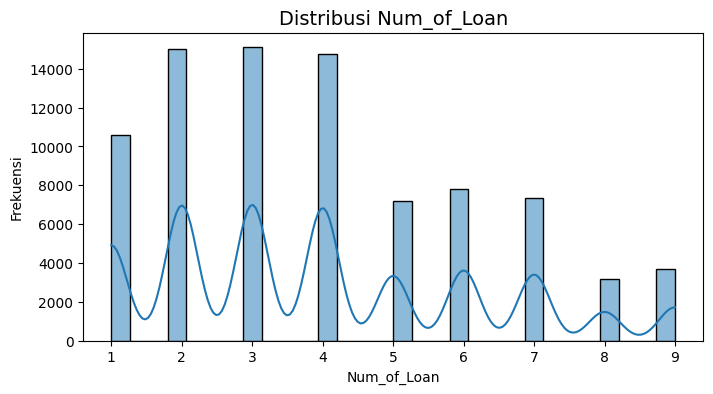

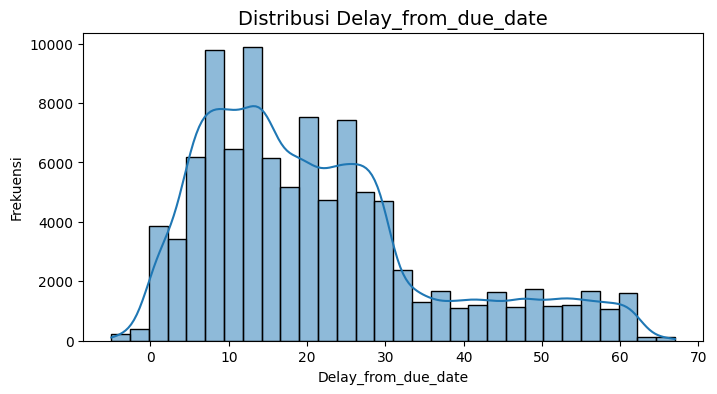

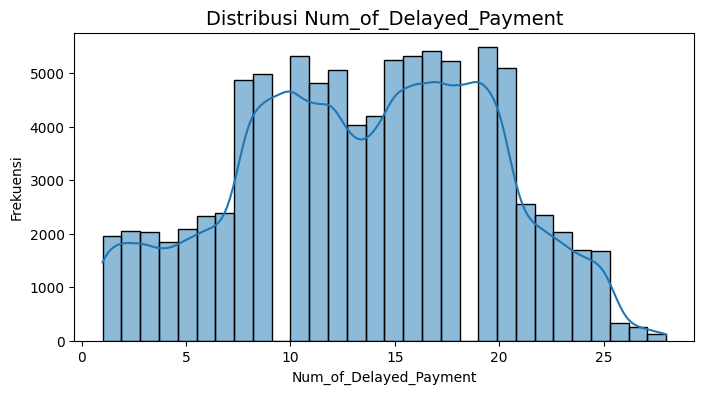

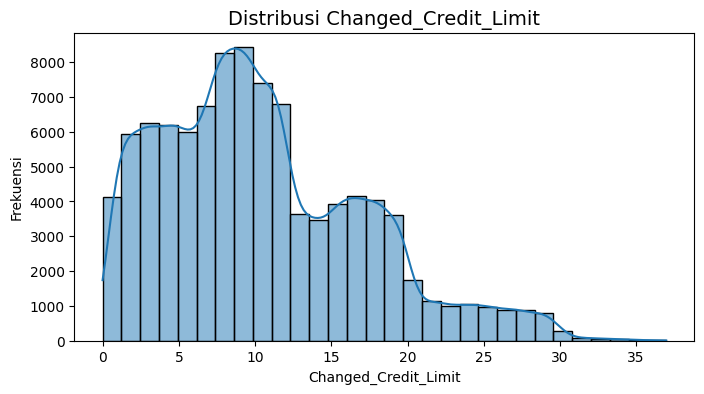

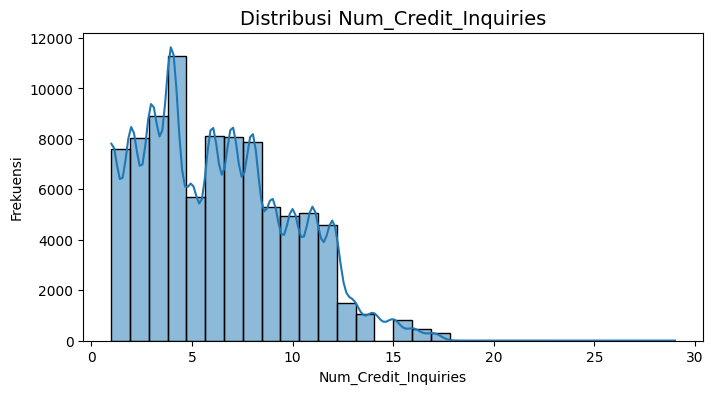

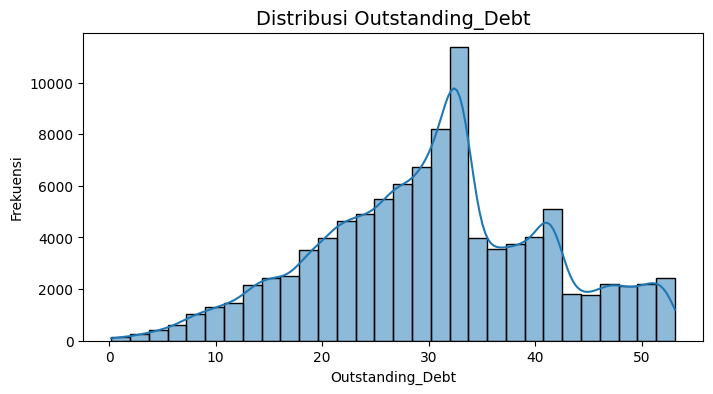

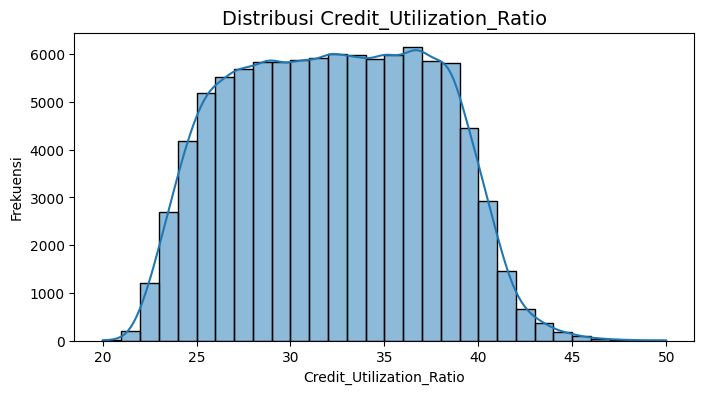

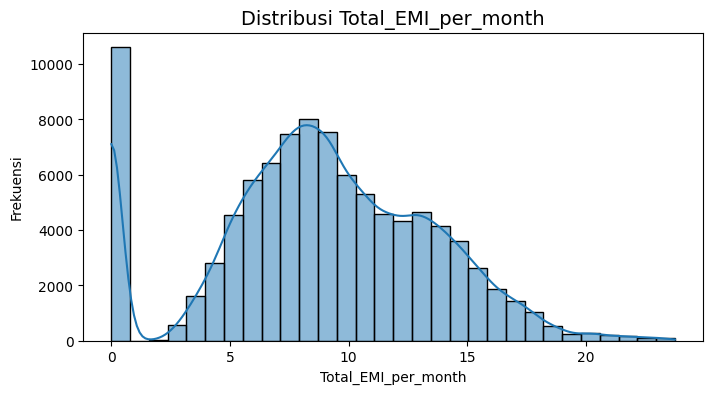

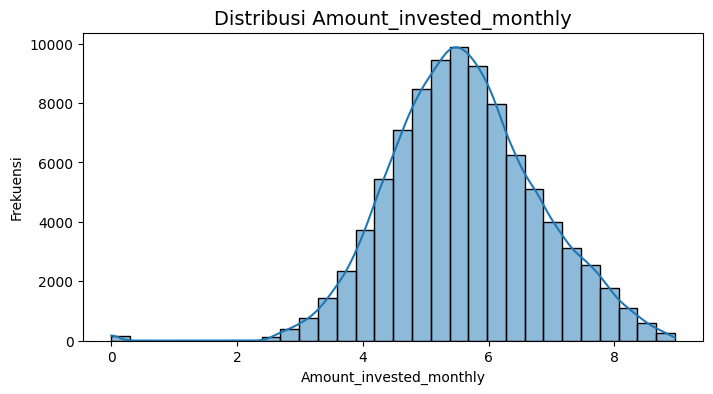

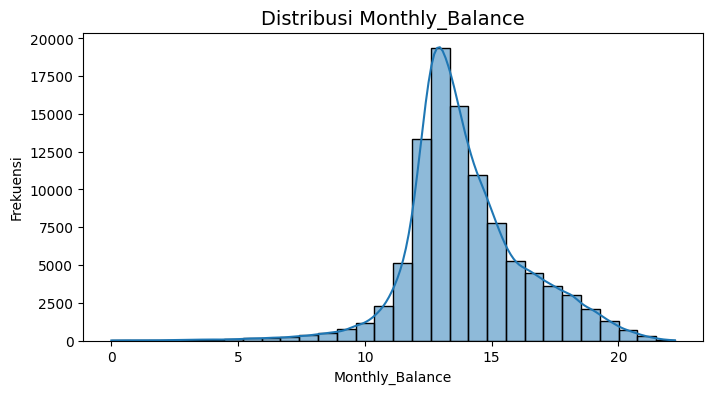

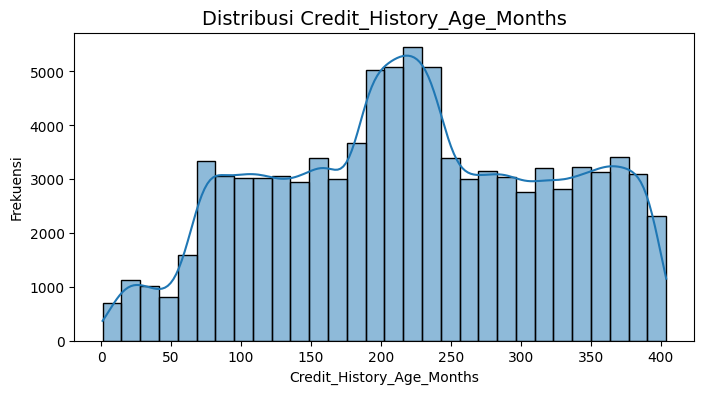

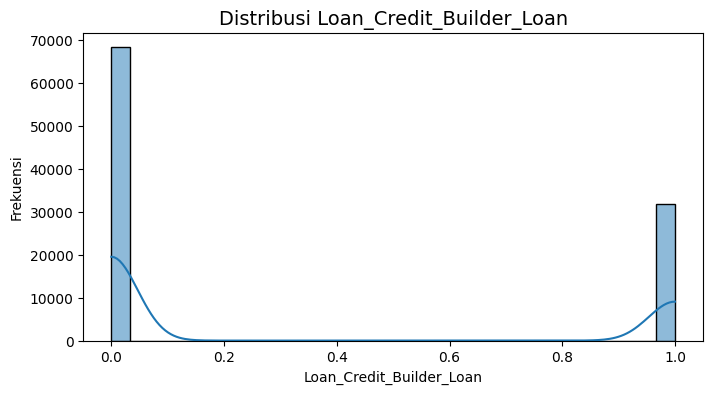

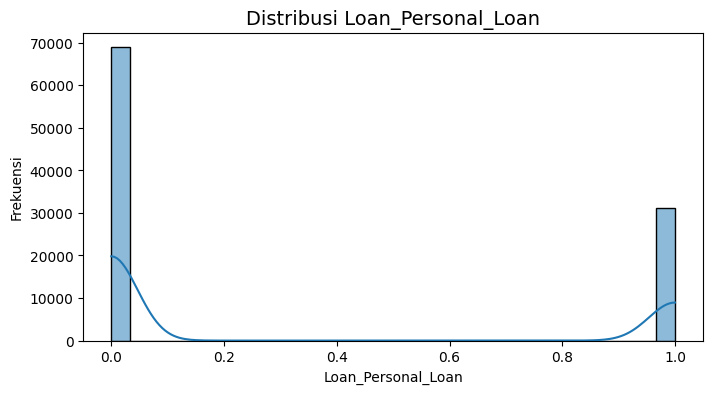

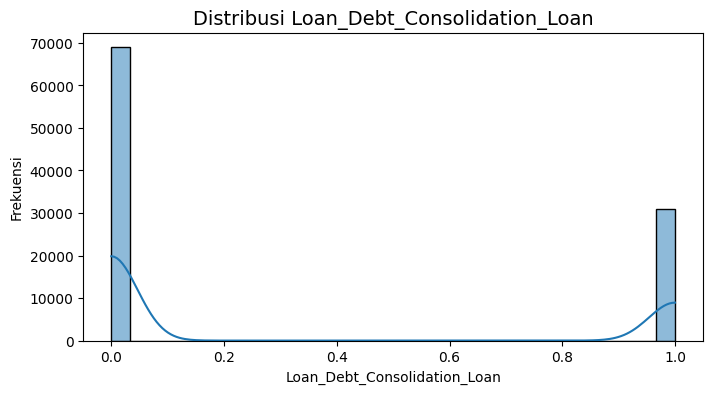

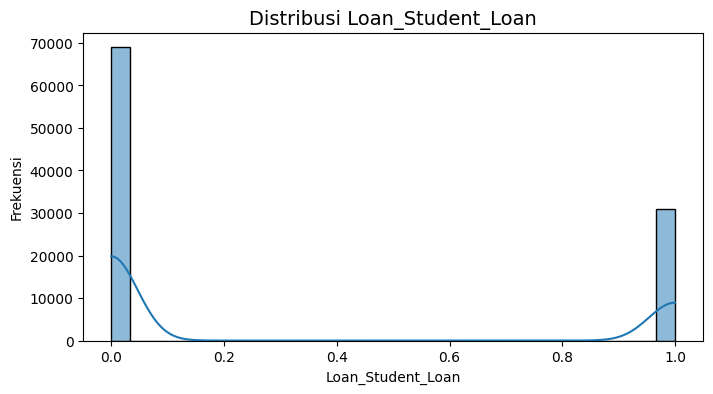

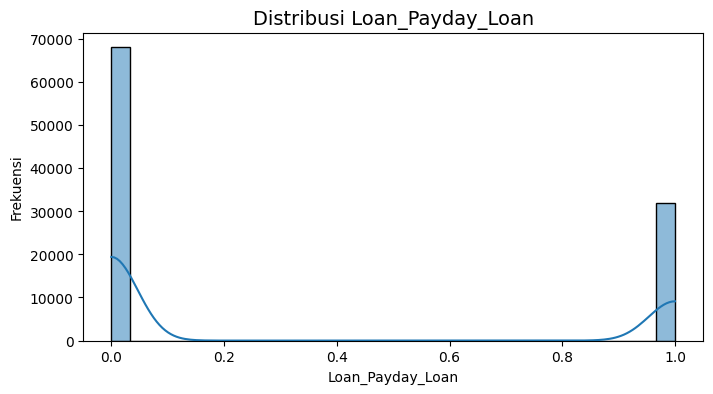

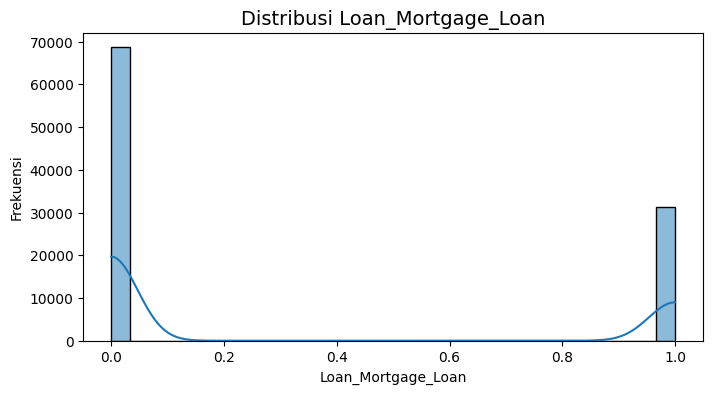

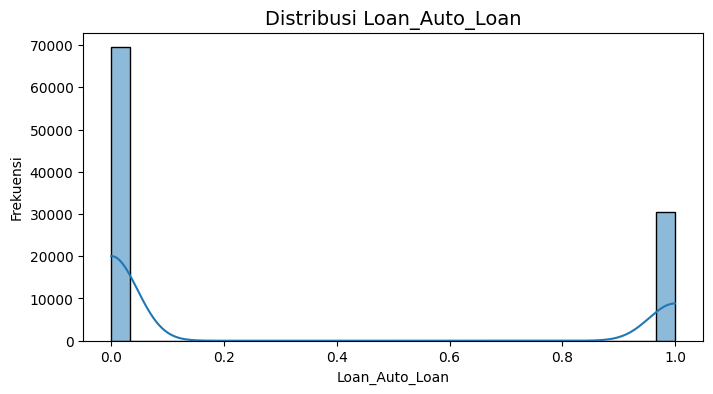

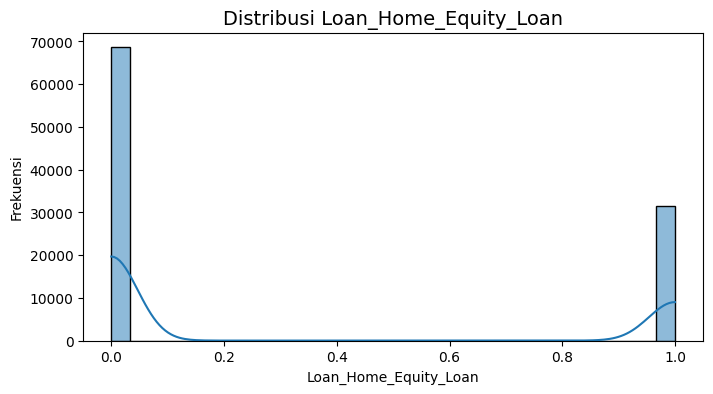

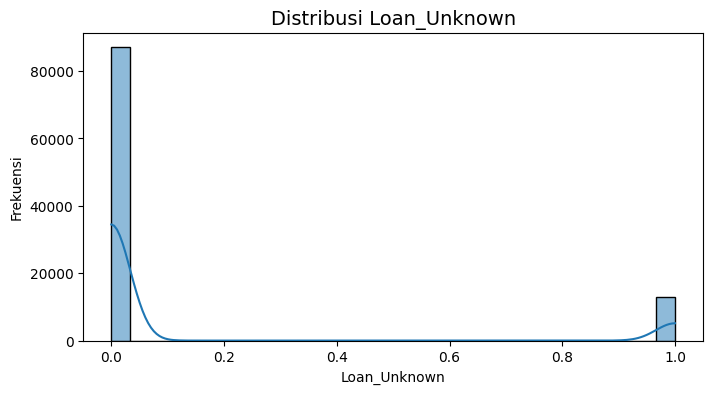

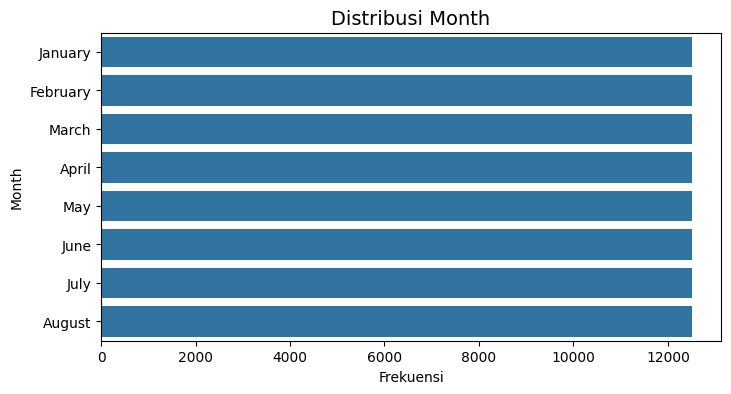

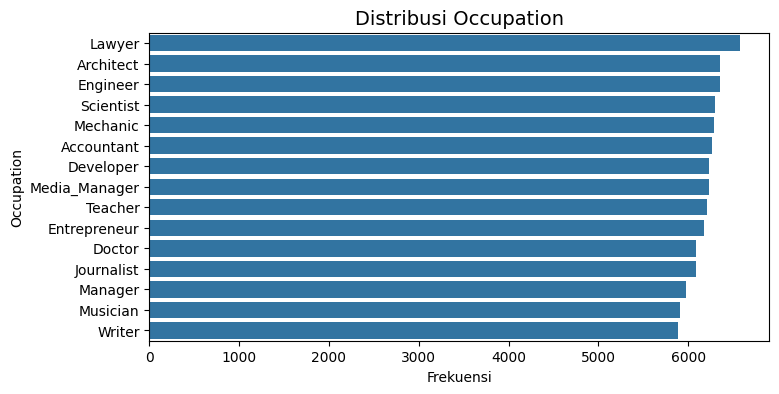

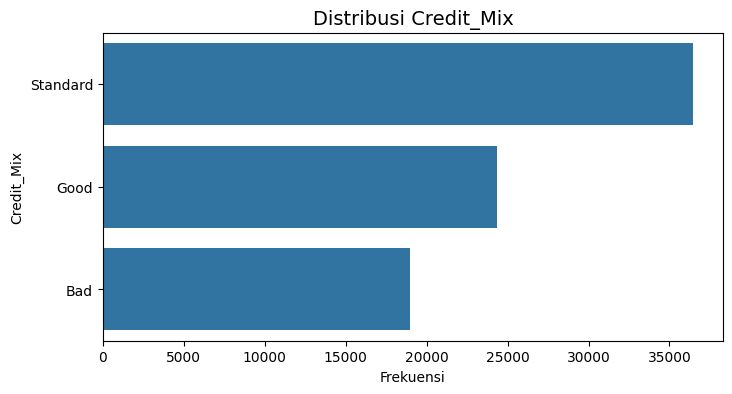

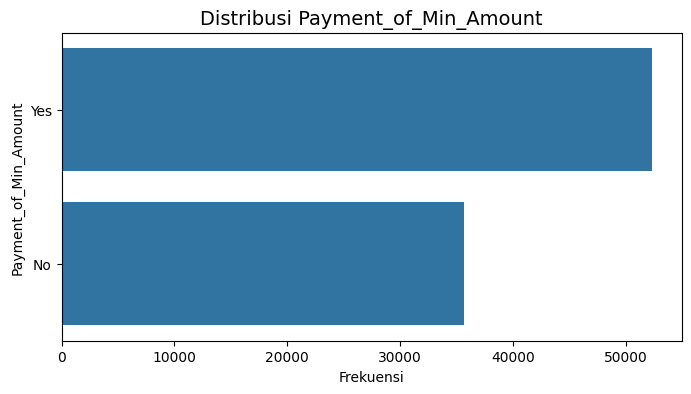

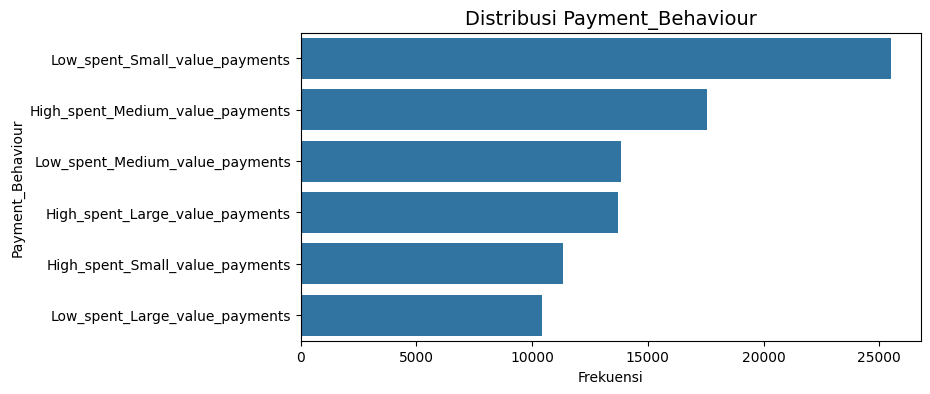

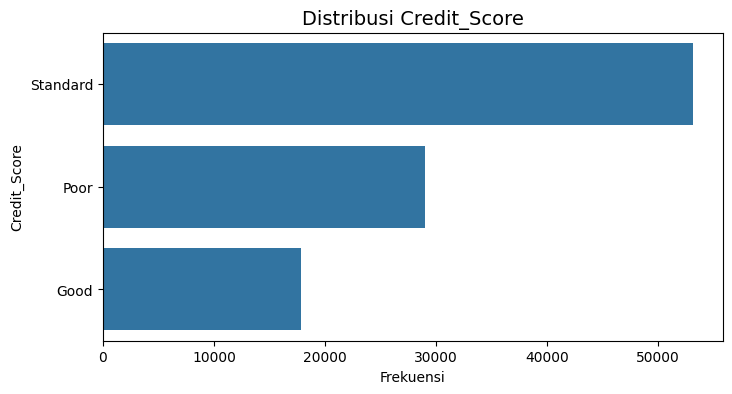

In [29]:
# Pisahkan fitur numerik dan kategorikal
num_cols = raw_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = raw_data.select_dtypes(include=["object"]).columns

# Univariate Analysis untuk variabel numerik
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(raw_data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribusi {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Univariate Analysis untuk variabel kategorikal dengan pendekatan adaptif
for col in cat_cols:
    unique_count = raw_data[col].nunique()
    plt.figure(figsize=(8, 4))

    if unique_count <= 20:
        # kategori sedikit → countplot normal
        sns.countplot(y=raw_data[col], order=raw_data[col].value_counts().index)
        plt.title(f"Distribusi {col}", fontsize=14)
        plt.xlabel("Frekuensi")
        plt.ylabel(col)
    else:
        # kategori terlalu banyak → tampilkan top 10
        top_values = raw_data[col].value_counts().head(10)
        sns.barplot(x=top_values.values, y=top_values.index)
        plt.title(
            f"Top 10 Kategori pada {col} (total unique: {unique_count})", fontsize=14
        )
        plt.xlabel("Frekuensi")
        plt.ylabel(col)

    plt.show()
